## A 2DCNN network for MNIST image classification

In [12]:
# Import the required packages
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D, Conv1D, MaxPooling1D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

from keras.utils import to_categorical

# Get the training data

In [2]:
# Get the training data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
classes_num = len(classes)
print('Unique output classes : ', classes)
print('Total number of outputs : ', classes_num)

Unique output classes :  [0 1 2 3 4 5 6 7 8 9]
Total number of outputs :  10


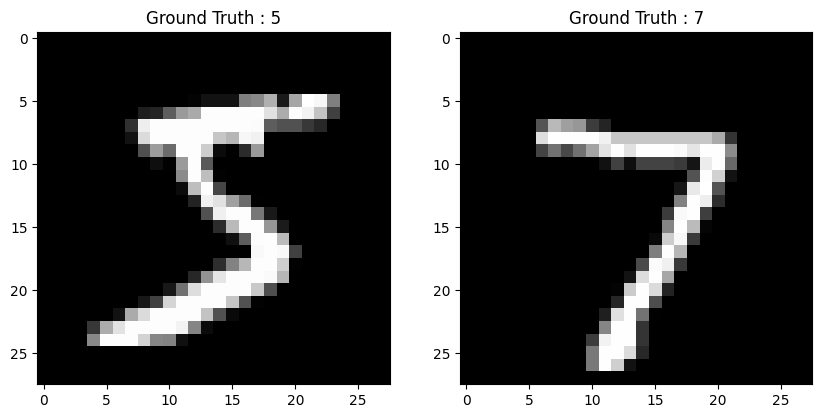

In [4]:
# let's see some sample images in the dataset

# Define the plot size
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
plt.show()

### Alternative: Use seaborn or OpenCV for visualization

In [5]:
# Change the image format from 2D array of size 28x28 to 1D arrya of size 784
print(train_images.shape)

(60000, 28, 28)


In [6]:
# Now reshape the 2D array to 1D array

train_data = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_data = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

In [7]:
# Change to float datatype

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [8]:
# Change the labels from integer to categorical data

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Check how the one hot encoded labels look like
print(test_labels_one_hot[0:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [13]:
model=Sequential()

#model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=4, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=4, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))

model.add(Dense(classes_num,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Let's see how the model looks and check the parameters

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,334 (294.27 KB)

 Trainable params: 75,334 (294.27 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [15]:
# Now we can start the training

history = model.fit(train_data, train_labels_one_hot, batch_size=32, epochs=10, verbose =1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8273 - loss: 3.6266 - val_accuracy: 0.9483 - val_loss: 0.1811
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9589 - loss: 0.1414 - val_accuracy: 0.9670 - val_loss: 0.1181
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0780 - val_accuracy: 0.9708 - val_loss: 0.0900
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9777 - loss: 0.0678 - val_accuracy: 0.9721 - val_loss: 0.0874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9839 - loss: 0.0491 - val_accuracy: 0.9747 - val_loss: 0.0841
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9739 - val_loss: 0.0843
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9884 - loss: 0.0345 - val_accuracy: 0.9756 - val_loss: 0.0738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0301

## Evaluate the model

In [16]:
# let's run the trained model on test data and see how it performs

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.1227
Evaluation result on Test Data : Loss = 0.0952446386218071, accuracy = 0.9754999876022339


## Run the sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Probability of all the classes: [[6.7832513e-20 7.8811645e-08 9.9999988e-01 6.3997918e-16 8.2811750e-19
  6.0031727e-18 6.9399569e-19 5.3430483e-15 2.8454314e-16 3.0188610e-18]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Model prediction: 2


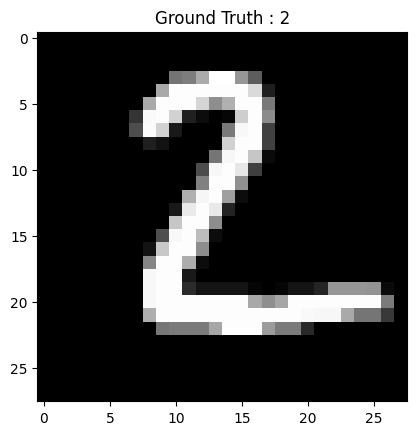

In [17]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[1],:])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[1],:])),axis=1))

# Display the predicted image
plt.imshow(test_images[1], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[1]))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Probability of all the classes: [[2.3978677e-16 7.1576608e-08 9.9999237e-01 1.5461839e-06 5.1173994e-19
  1.2619256e-16 6.4426482e-19 5.9920558e-06 1.3261187e-09 1.5748096e-18]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model prediction: 2


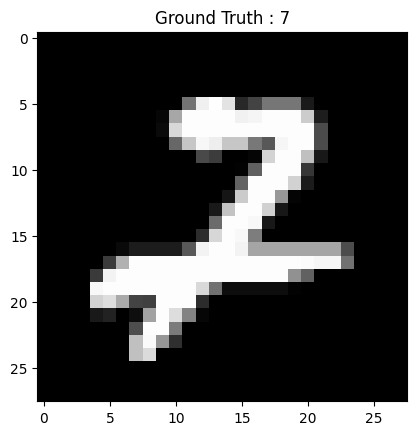

In [18]:
# Predict the most likely class

print("Probability of all the classes: {}".format(model.predict(test_data[[9009]])))

print("Model prediction: {}".format(np.argmax(model.predict(test_data[[9009]])),axis=1))

# Display the predicted image
plt.imshow(test_images[9009], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[9009]))
plt.show()

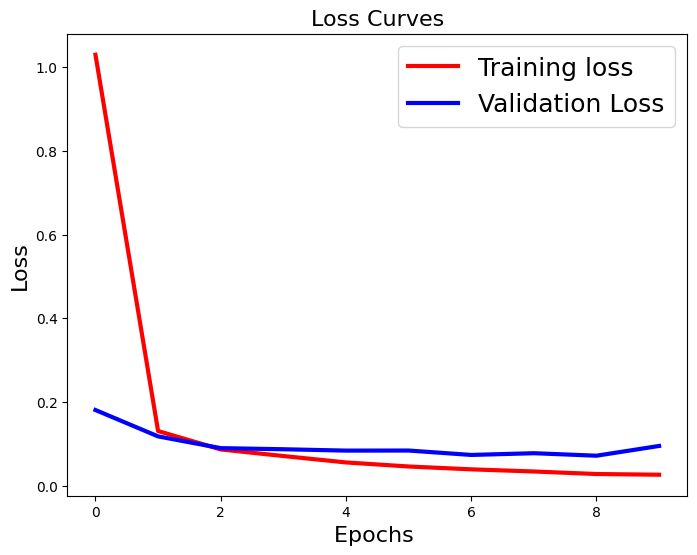

In [19]:
# Let us observe the training over the epochs

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

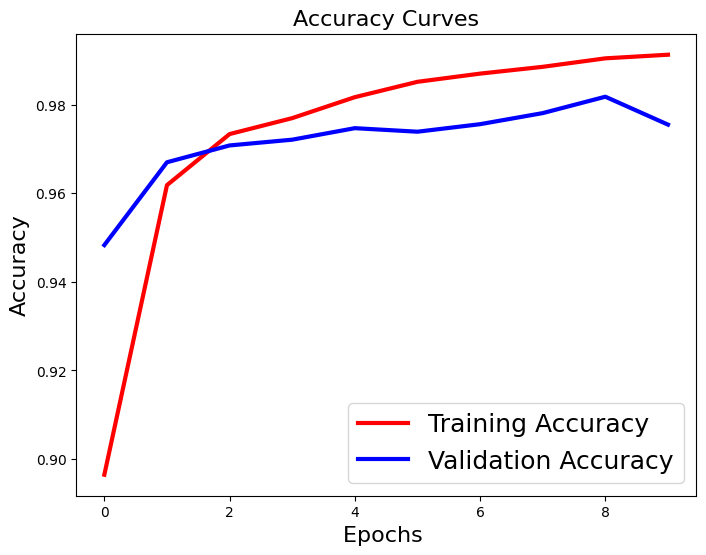

In [20]:

#Plot the Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

### Confusion Matrix

In [21]:
DIGITS = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
}

In [22]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([DIGITS[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([DIGITS[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [23]:
print(confusion_matrix(test_labels_one_hot, model.predict(test_data)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Pred    0     1     2    3    4    5    6     7    8    9
True                                                     
0     971     1     1    0    1    1    0     1    3    1
1       1  1131     2    0    0    0    0     0    1    0
2       2     4  1006    2    0    0    0     5   13    0
3       0     0     3  974    0   21    0     4    4    4
4       0     2     6    0  960    0    0     1    9    4
5       1     0     1    3    0  876    1     1    7    2
6       9     4     4    1    1   16  912     1   10    0
7       0     5    11    0    1    0    1  1001    3    6
8       2     1     8    5    0    1    0     4  950    3
9       0     4     1    1    9    2    1     5   12  974


## Classification report

In [24]:
from sklearn.metrics import accuracy_score, classification_report

In [25]:

y_true = np.argmax(test_labels_one_hot, axis=1)
y_pred = np.argmax(model.predict(test_data), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
report = classification_report(y_true, y_pred,digits=4)

In [27]:
print(report)

              precision    recall  f1-score   support

           0     0.9848    0.9908    0.9878       980
           1     0.9818    0.9965    0.9891      1135
           2     0.9645    0.9748    0.9696      1032
           3     0.9878    0.9644    0.9760      1010
           4     0.9877    0.9776    0.9826       982
           5     0.9553    0.9821    0.9685       892
           6     0.9967    0.9520    0.9738       958
           7     0.9785    0.9737    0.9761      1028
           8     0.9387    0.9754    0.9567       974
           9     0.9799    0.9653    0.9725      1009

    accuracy                         0.9755     10000
   macro avg     0.9756    0.9753    0.9753     10000
weighted avg     0.9758    0.9755    0.9755     10000



In [28]:
print(accuracy_score(y_true, y_pred))

0.9755
